# Algorithmic Trading Strategy in Python

In [1]:
#Import all the libraries
#导入所需的模块
import datetime
import matplotlib.pyplot as plt
import pandas_datareader as web
import yfinance as yf
from datetime import date, time
plt.style.use("dark_background")

In [2]:
# Setting the moving average
# 设置移动平均线
ma_1 = 20
ma_2 = 50

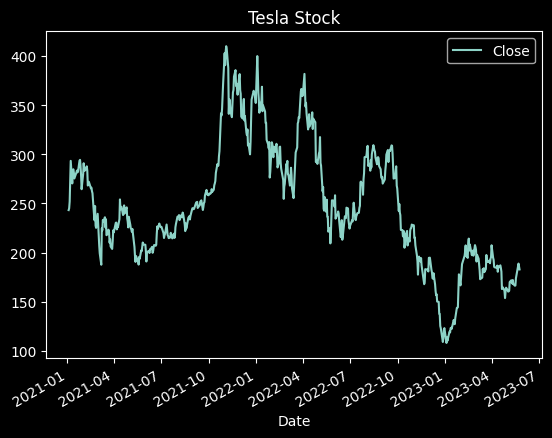

In [3]:
#Download Historical Data for tesla stock
#从yahoo财经下载股票数据
data = yf.download('TSLA',
                start='2021-01-01',
                end=date.today(),
                progress=False,)
data.plot(y='Close', title='Tesla Stock')
plt.show()

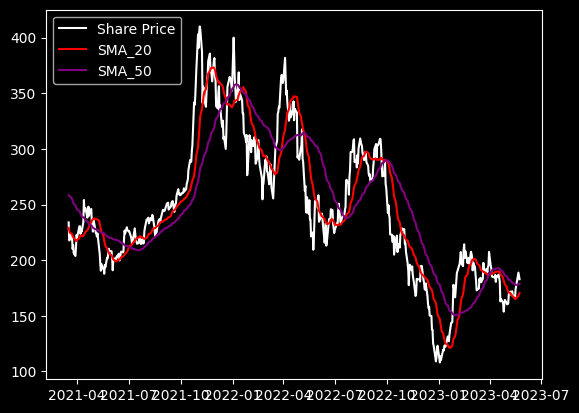

In [4]:
#Plot the graph with MA20 and MA50 
#画出20和50的移动平均线
data[f'SMA_{ma_1}'] = data['Adj Close'].rolling(window=ma_1).mean()
data[f'SMA_{ma_2}'] = data['Adj Close'].rolling(window=ma_2).mean()
data = data.iloc[ma_2:]
plt.plot(data['Adj Close'], label="Share Price", color="white")
plt.plot(data[f'SMA_{ma_1}'], label=f'SMA_{ma_1}', color="red")
plt.plot(data[f'SMA_{ma_2}'], label=f'SMA_{ma_2}', color="purple")
plt.legend(loc="upper left")
plt.show()

In [5]:
# Show MA signal crossing data
#显示MA信号交叉数据
buy_signals = []
sell_signals = []
trigger = 0

for x in range(len(data)):
    if data[f'SMA_{ma_1}'].iloc[x] > data[f'SMA_{ma_2}'].iloc[x] and trigger != 1:
        buy_signals.append(data['Adj Close'].iloc[x])
        sell_signals.append(float('nan'))
        trigger = 1
    elif data[f'SMA_{ma_1}'].iloc[x] < data[f'SMA_{ma_2}'].iloc[x] and trigger != -1:
        buy_signals.append(float('nan'))
        sell_signals.append(data['Adj Close'].iloc[x])
        trigger = -1
    else:
        buy_signals.append(float('nan'))
        sell_signals.append(float('nan'))

data['Buy Signals'] = buy_signals
data['Sell Signals'] = sell_signals

data

C:\Users\Asus\AppData\Local\Temp\ipykernel_16148\3638308164.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Buy Signals'] = buy_signals
C:\Users\Asus\AppData\Local\Temp\ipykernel_16148\3638308164.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sell Signals'] = sell_signals


,Open,High,Low,Close,Adj Close,Volume,SMA_20,SMA_50,Buy Signals,Sell Signals
Date,,,,,,,,,,
2021-03-17,218.956665,234.576660,217.003326,233.936661,233.936661,121117500,229.063666,258.467800,NaN,233.936661
2021-03-18,228.096664,229.743332,217.333328,217.720001,217.720001,99674400,226.826666,257.921466,NaN,NaN
2021-03-19,215.533340,219.076660,208.206665,218.289993,218.289993,128682000,224.719500,257.247400,NaN,NaN
2021-03-22,228.196671,233.206665,222.916672,223.333328,223.333328,118536600,223.977833,256.273799,NaN,NaN
2021-03-23,225.256668,225.933334,219.169998,220.720001,220.720001,91475700,223.366499,254.821400,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2023-05-18,174.220001,177.059998,172.449997,176.889999,176.889999,109520300,165.685999,177.807199,NaN,NaN
2023-05-19,177.169998,181.949997,176.309998,180.139999,180.139999,136024200,166.438999,177.951599,NaN,NaN
2023-05-22,180.699997,189.320007,180.110001,188.869995,188.869995,132001400,167.754999,178.260199,NaN,NaN


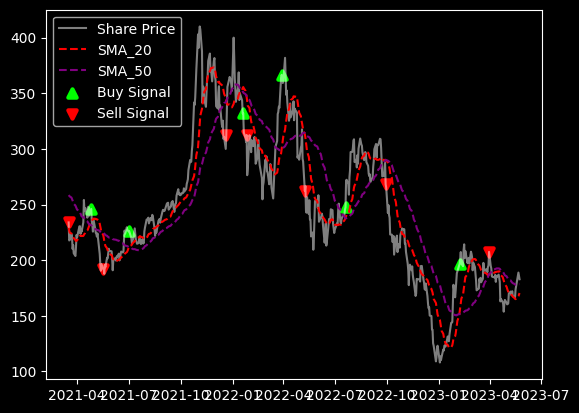

In [6]:
#Show buy and sell signals on the graph
#在图中显示买入和卖出信号
plt.plot(data['Adj Close'], label="Share Price", alpha=0.5, color="white")
plt.plot(data[f'SMA_{ma_1}'], label=f'SMA_{ma_1}', color="red", linestyle="--")
plt.plot(data[f'SMA_{ma_2}'], label=f'SMA_{ma_2}', color="purple", linestyle="--")
plt.scatter(data.index, data['Buy Signals'], label="Buy Signal", marker="^", color="#00ff00", lw=3)
plt.scatter(data.index, data['Sell Signals'], label="Sell Signal", marker="v", color="#ff0000", lw=3)
plt.legend(loc="upper left")
plt.show()